# Airbnb Regression

In [1]:
# import the libraries

%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('whitegrid')

__________________
## Load Data

In [62]:
path = input("Path to data: ")
df_airbnb = pd.read_csv(path)

Path to data: data/train.csv


In [3]:
print(df_airbnb.columns)
df_airbnb.head()

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,13662370,3.81,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.50,Real Bed,strict,True,...,41.85,-87.68,Pilsen Arts Community Custom Home,Pilsen,17,97.00,https://a0.muscache.com/im/pictures/81318153/a...,60608,1.00,1.00
1,4765892,4.94,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.00,Real Bed,strict,True,...,34.07,-118.25,Apartment 5 minutes from DTLA & Dodger Stadium,Echo Park,2,100.00,https://a0.muscache.com/im/pictures/aa00250e-0...,90012,1.00,1.00
2,21169968,4.94,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.00,Real Bed,moderate,True,...,40.70,-73.92,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.00,https://a0.muscache.com/im/pictures/d9220535-c...,11237,2.00,3.00
3,7939196,4.87,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.00,Real Bed,strict,True,...,40.74,-73.99,Grande Super Large APT !!!,Flatiron District,12,82.00,NaN,10010,1.00,3.00
4,18161036,3.66,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.00,Real Bed,flexible,True,...,34.05,-117.73,Private Cozy and Clean Rooms in Pomona,NaN,2,100.00,https://a0.muscache.com/im/pictures/e0c9b2f9-a...,91766,1.00,1.00


______________________
## Missing Values

In [63]:
df_airbnb.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   133
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              10856
host_has_profile_pic        127
host_identity_verified      127
host_response_rate        12551
host_since                  127
instant_bookable              0
last_review               10826
latitude                      0
longitude                     0
name                          0
neighbourhood              4675
number_of_reviews             0
review_scores_rating      11450
thumbnail_url              5629
zipcode                     645
bedrooms                     63
beds                         85
dtype: int64

### 1. Review scores rating
### 2. Bathrooms
### 3. Bedrooms

In [64]:
#Bathrooms
import math

print("Bathrooms x bedrooms = ", df_airbnb['bathrooms'].corr(df_airbnb['bedrooms']).round(3))
print("Bathrooms x accommodates = ", df_airbnb['bathrooms'].corr(df_airbnb['accommodates']).round(3))

Bathrooms x bedrooms =  0.589
Bathrooms x accommodates =  0.505


In [74]:
bedrooms_med = df_airbnb.groupby('bedrooms', sort=False)['bathrooms'].median()
print(bedrooms_grp)

bedrooms
0.00    1.00
1.00    1.00
2.00    1.00
3.00    2.00
4.00    2.50
5.00    3.50
6.00    4.00
7.00    4.50
8.00    4.50
9.00    4.00
10.00   6.00
Name: bathrooms, dtype: float64


<bound method IndexOpsMixin.value_counts of 89      1.00
390     1.00
810     1.00
1484    1.00
1516    1.00
2172    1.00
2458    1.00
2740    1.00
2814    1.00
3216    1.00
3640    1.00
4025     nan
4154    1.00
4554    1.00
4646    1.00
5520    1.00
6171    1.00
6186    3.00
6344    1.00
6754    1.00
6795    1.00
7847    1.00
7936    3.00
8359    1.00
8453    1.00
8748    1.00
9530    1.00
9633    1.00
9995    1.00
10801   1.00
        ... 
40538   1.00
40818   1.00
41588   1.00
41817   2.00
41870   1.00
42382   1.00
42443   1.00
42538   1.00
43177    nan
43795   1.00
43894    nan
44720   4.00
45300   1.00
45637   1.00
45745   1.00
46944   1.00
47022   1.00
47080   1.00
48165   1.00
48586   1.00
48591   1.00
49075   1.00
49120   1.00
49165   1.00
49179   1.00
49735   1.00
50269   3.00
50392   1.00
50397   1.00
50402   1.00
Name: bedrooms, Length: 133, dtype: float64>

In [77]:
for idx in df_airbnb.index[df_airbnb['bathrooms'].isnull()]:
    n_bedrms = df_airbnb.loc[idx,'bedrooms']
    print(idx, '-', n_bedrms)

    if(n_bedrms > 0): #replace by the median
        df_airbnb.at[idx,'bathrooms'] = bedrooms_grp.iloc[int(n_bedrms)]
        
    else: #replace by the median bathroom
        df_airbnb.at[idx,'bathrooms'] = df_airbnb['bathrooms'].mean()

df_airbnb['bathrooms'].isnull().sum()

0

In [9]:
#Bedrooms

print(df_airbnb['bedrooms'].corr(df_airbnb['beds']))
print(df_airbnb['bedrooms'].corr(df_airbnb['accommodates']))

0.7135956188054617
0.7090195281599462


In [ ]:
# Review scores rating
'''
rsr_group = df_airbnb.groupby('number_of_reviews')['review_scores_rating']['id']
df_airbnb[df_airbnb['review_scores_rating'].isnull()]['number_of_reviews'].value_counts()


for n in rsr_group.index:
    rsr_df = df_airbnb[(df_airbnb['review_scores_rating'].isnull()) & (df_airbnb['number_of_reviews'] == n)]
    rsr_df['review_scores_rating'].fillna(rsr_group[n])
    #df_airbnb['review_scores_rating'] = rsr_df['review_scores_rating']

    
#df_airbnb['review_scores_rating'] = df_airbnb['review_scores_rating'].fillna(df_airbnb['number_of_reviews']*df_airbnb['review_scores_rating'].mean())
'''


_________________________________
## Feature Engineering

In [78]:
categorical=['property_type','room_type','bed_type','cancellation_policy', 'city']
df_dummies=pd.get_dummies(df_airbnb[categorical])

new_df = pd.concat([df_airbnb, df_dummies], axis=1)

In [82]:
print("New DF Columns= ",new_df.shape[1])
print(new_df.columns)

New DF Columns=  81
Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Boutique hotel',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Castle', 'property_type_Cave',
       'property_type_Chalet', 'property_type_Condominium',
       'property_type_Dorm', 'property_type_Earth House',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property

______________________________
## Train the Models

In [83]:
X_columns = ['bathrooms', 'accommodates', 'number_of_reviews'] + list(df_dummies.columns)
y_column = ['log_price']

# handle missing values
df_train = new_df[X_columns + y_column]
print(df_train.shape)

(51000, 56)


In [86]:
# Split

threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40800, 55)
y_train (40800, 1)
X_test (10200, 55)
y_test (10200, 1)


In [88]:
# Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [89]:
# Random Forest

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

C:\Users\A-Sha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\A-Sha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [90]:
# KNN

kn_model = KNeighborsRegressor(10)
kn_model.fit(X_train, y_train)
kn_pred = kn_model.predict(X_test)

_________________
## Models Evaluations

RMSE 0.4765331722595068


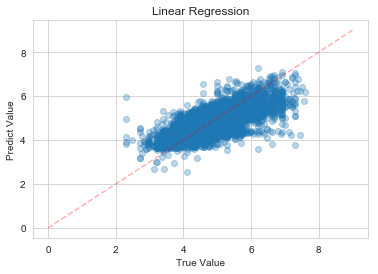

In [91]:
rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print('RMSE', rmse)
plt.scatter(y_test, lr_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

RMSE 0.48695478410233894


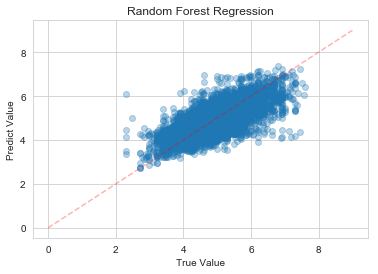

In [92]:
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print('RMSE', rmse)
plt.scatter(y_test, rf_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Random Forest Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

RMSE 0.49191237918144776


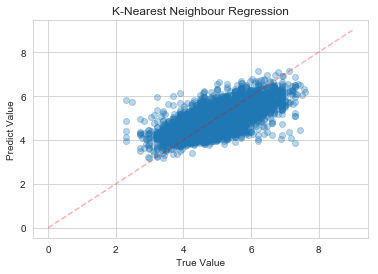

In [93]:
rmse = np.sqrt(mean_squared_error(y_test, kn_pred))
print('RMSE', rmse)
plt.scatter(y_test, kn_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('K-Nearest Neighbour Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

______________________
## Prepare Submission

In [ ]:
df_prediction = df_test[X_columns].fillna(0.0)
df_test['log_price'] = model.predict(df_prediction)
df_test[['id', 'log_price']]

In [ ]:
df_test[['id', 'log_price']].to_csv('submission_linear_regression.csv', index=False)